<a href="https://colab.research.google.com/github/anurag629/car-direction-angle/blob/main/Predict_the_direction_of_travel_(in_camera_frame).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Preprocessing

### 1) Loding files


In [1]:
!git clone 'https://github.com/anurag629/calib_challenge'

Cloning into 'calib_challenge'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 70 (delta 18), reused 66 (delta 18), pack-reused 0
Unpacking objects: 100% (70/70), 357.64 MiB | 10.51 MiB/s, done.


1. Use the os library to get a list of all the files in the 'labelled' folder. You can use the os.listdir() function to get a list of all the files in a directory.


In [2]:
import os

labeled_folder = '/content/calib_challenge/labeled'
labeled_files = os.listdir(labeled_folder)


2. Iterate through the list of files in the 'labelled' folder. For each file, check if it has the '.hevc' extension. If it does, use the OpenCV library to load the video.


In [3]:
import cv2

videos = {}
for file in labeled_files:
    if file.endswith('.hevc'):
        video_path = os.path.join(labeled_folder, file)
        cap = cv2.VideoCapture(video_path)
        videos[file] = cap


3. For each file, check if it has the '.txt' extension. If it does, use the pandas library to read the file and store the labels in a dictionary.

In [4]:
import pandas as pd

labels = {}
for file in labeled_files:
    if file.endswith('.txt'):
        label_path = os.path.join(labeled_folder, file)
        labels[file] = pd.read_csv(label_path, header=None)


Now we have a dictionary videos which contains the video files and a dictionary labels which contains the labels for each video. You can access each video using its file name as the key and each label using the same file name as the key.

For loading files in the 'unlabeled' folder, you can use the similar approach as above, except you don't have to load the labels. Instead, you can use the os.listdir() function to get a list of all the files in the 'unlabeled' folder and then use the OpenCV library to load each video file.

In [5]:
unlabeled_folder = '/content/calib_challenge/unlabeled'
unlabeled_files = os.listdir(unlabeled_folder)

unlabeled_videos = {}
for file in unlabeled_files:
    if file.endswith('.hevc'):
        video_path = os.path.join(unlabeled_folder, file)
        cap = cv2.VideoCapture(video_path)
        unlabeled_videos[file] = cap


### 2) Visualize the videos

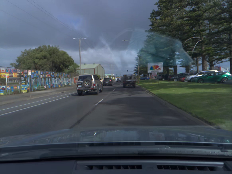

In [6]:
# Get the first video from the 'videos' dictionary
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

video_file = list(videos.keys())[3]
cap = videos[video_file]
while cap.isOpened():
#while True:
  ok, frame = cap.read()

  if not ok:
    break

  if ok:
    #edit your video size here, to adjust the performance
    largura=frame.shape[1] 
    altura=frame.shape[0]
    lamenor=int(frame.shape[1]/5)
    altmenor=int(frame.shape[0]/5)
    frame = cv2.resize(frame, (lamenor,altmenor))

    # as you read
    clear_output(wait=True)
    cv2_imshow(frame)
    #delay time to update frame
    time.sleep(0)

  if cv2.waitKey(1100) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

### 3) Converting the videos to greyscle

In [7]:
save_path_l = '/content/calib_challenge/grey_scale_labelled/'


for i, video_file in enumerate(videos):
    os.makedirs(save_path_l + str(i),exist_ok=True)
    cap = videos[video_file]
    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_path_l + str(i), "_frame%d.jpg" % count), gray_frame)
        count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
cv2.destroyAllWindows()

In [8]:
save_path_l = '/content/calib_challenge/grey_scale_unlabelled/'

for i, video_file in enumerate(unlabeled_videos):
    os.makedirs(save_path_l + str(i),exist_ok=True)
    cap = unlabeled_videos[video_file]
    count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_path_l + str(i), "_frame%d.jpg" % count), gray_frame)
        count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
cv2.destroyAllWindows()

## Step 2: Loading data for training

### 1. Reading images and text files

In [9]:
import numpy as np

In [ ]:
# Define the path to the labelled folder and the subfolders
path_image = '/content/calib_challenge/grey_scale_labelled/'
path_text = '/content/calib_challenge/labeled/'
folders = ['0', '1', '2', '3', '4']

# Initialize lists to store the images and their corresponding angles
images = []
angles = []

# Loop through each subfolder
for folder in folders:
    # Define the path to the text file and the images in the subfolder
    text_file = os.path.join(path_text, folder + '.txt')
    image_folder = os.path.join(path_image, folder)

    # Load the angles from the text file into a numpy array
    angle_data = np.loadtxt(text_file)

    # Loop through each image in the subfolder
    for image_name in os.listdir(image_folder):
        # Load the image using opencv
        image = cv2.imread(os.path.join(image_folder, image_name))

        # Append the image and its corresponding angle to the lists
        images.append(image)
        angles.append(angle_data)


### 4) Splitting the data for training and testing 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the labelled_frames and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(labelled_frames, labels, test_size=0.2, random_state=42)


NameError: ignored

In [ ]:
dfdfdf